# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

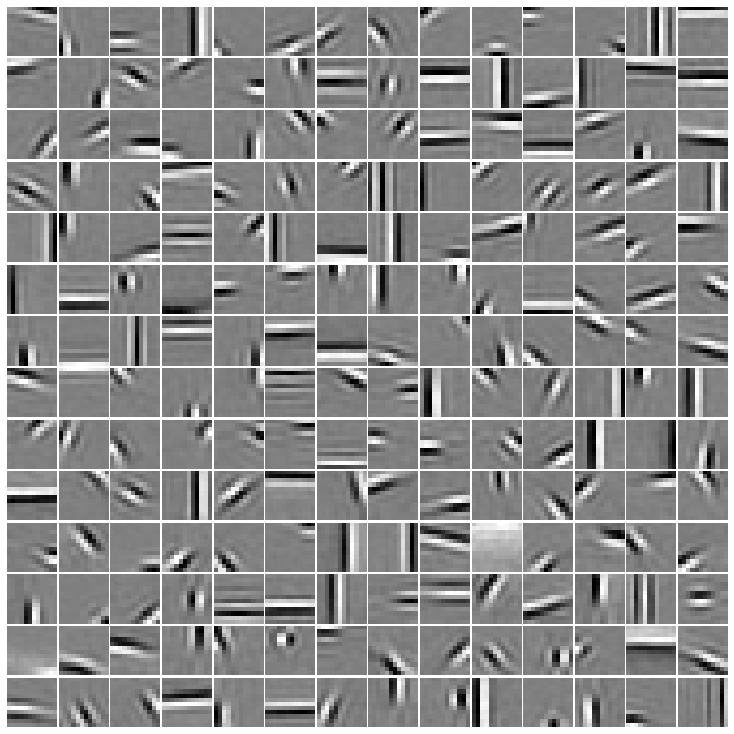

In [4]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

database = 'probe/database/'


shl = SHL(database=database, DEBUG_DOWNSCALE=DEBUG_DOWNSCALE)
dico = shl.learn_dico()
_ = dico.show_dico(fname='ssc_homeo.png')

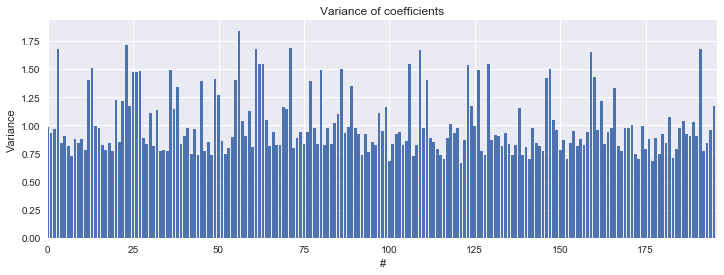

In [5]:
data = shl.get_data()
_ = dico.plot_variance(data)

In [6]:
_ = shl.plot_variance_histogram(dico, fname='ssc_homeo_hist.png')

AttributeError: 'SHL' object has no attribute 'plot_variance_histogram'

### control: learning without homeostasis

During the learning, to avoid divergence, the norm of the filters is shunted to $1$.

In [ ]:
from shl_scripts import SHL
shl = SHL(eta_homeo=0., DEBUG_DOWNSCALE=DEBUG_DOWNSCALE)
dico = shl.learn_dico()
_ = dico.show_dico(fname='ssc_nohomeo.png')

In [ ]:
_ = dico.plot_variance(data)

In [ ]:
_ = shl.plot_variance_histogram(dico, fname='ssc_nohomeo_hist.png')

# Sparse Hebbian Learning : reproducing SparseNet

If we test the convergence of SparseNet as a function of different learning parameters, it shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

See :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the ``scikit-learn`` package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts